# Visualisation en python
Ce notebook a pour onbjectif de vous donner un aperçu de quelques fonctions de visualisation en python en utilisant la bibliothèque seaborn. Nous allons utiliser le jeu de données tips pour cette présentation.

## import des données

In [3]:
import numpy as np
import pandas as pd
tips = pd.read_csv("tips.csv", header = 0, sep = ",")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## Seaborn
Le module, seaborn , est basé sur matplotlib. Il faut donc ajouter la ligne %matplotlib inline dans un notebook, pour pouvoir voir les graphiques.


In [4]:
import seaborn as sb

%matplotlib inline

# Variable quantitative

## la fonction displot()
La fonction distplot() nous permet de réaliser les graphiques de distribution d'une variable quantitative. Par défaut, elle rvisualise un histogramme avec une estimation de la densité.

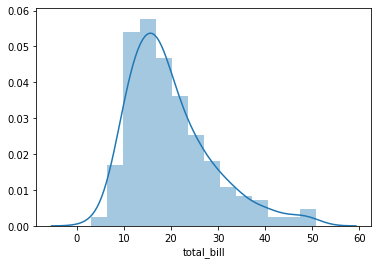

In [5]:
sb.distplot(tips.total_bill)

La fonction displot dispose d'un paramètre kde (True par défaut) qui permet de modifier la visualisation. Pour ne garder que l'histogramme, on indique qu'on ne souhaite pas l'estimation de la densité en modfiant la valeur du paramètre kde à False. Ainsi, l'histogramme devient en effectifs.

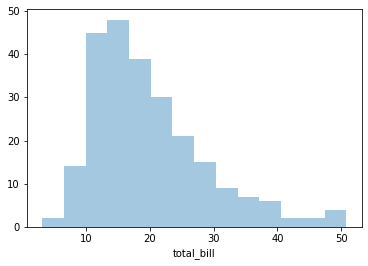

In [6]:
sb.distplot(tips.total_bill, kde = False)

De même, on peut afficher que la densité. Auquel cas, on supprime l'histogramme en mettant le paramètre hist à False.

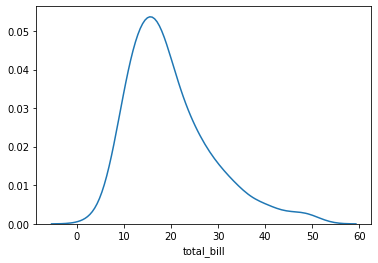

In [7]:
sb.distplot(tips.total_bill, hist = False)

De même, il est possible de choisir le nombre de bins à afficher en modifiant le paramètre bins

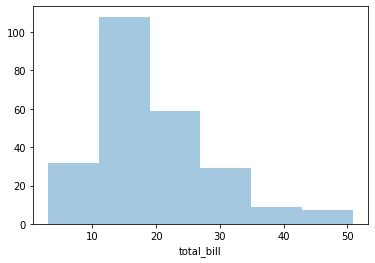

In [8]:
sb.distplot(tips.total_bill, bins = 6, kde = False)

Il est aussi possible de choisir les limites des intervalles, avec le même paramètre bins. Dans ce cas, il faut veiller à faire un histogramme en densité. Si on ne souhaite pas avoir l'estimation de la densité, on peut l'obtenir tout de même avec le paramètre norm_hist.

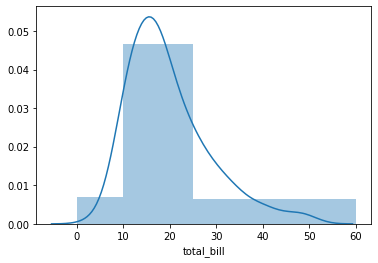

In [9]:
sb.distplot(tips.total_bill, bins = [0, 10, 25, 60], norm_hist = True, kde = True)

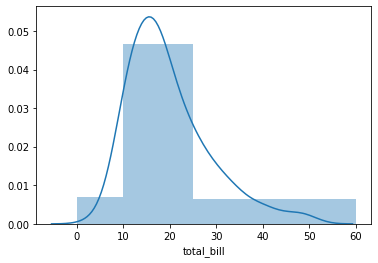

In [10]:
sb.distplot(tips.total_bill, bins = [0, 10, 25, 60], norm_hist = False , kde = True)

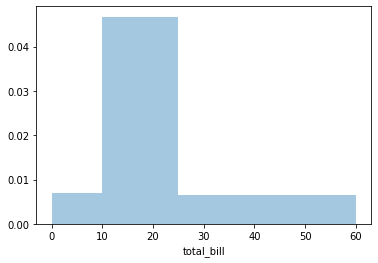

In [11]:
sb.distplot(tips.total_bill, bins = [0, 10, 25, 60], norm_hist = True, kde = False)

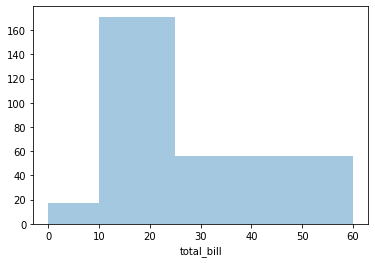

In [12]:
sb.distplot(tips.total_bill, bins = [0, 10, 25, 60], norm_hist = False, kde = False)

## fonction boxplot()

La fonction boxplot() nous permet de réaliser une boîte à moustache (soit verticale en mettant la variable en y, soit horizontale en la mettant en x).

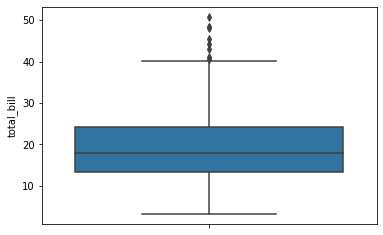

In [13]:
sb.boxplot(y = "total_bill", data = tips)

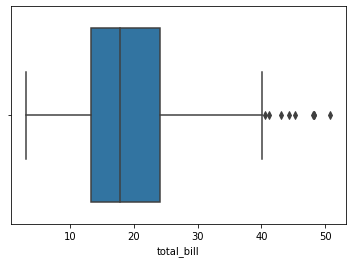

In [14]:
sb.boxplot(x = "total_bill", data=tips)

## la fonction pointplot()
On peut également représenter la moyenne et l'écart-type, le choix entre vertical (y) ou horizontal (x), en utilisant la fonction pointplot()

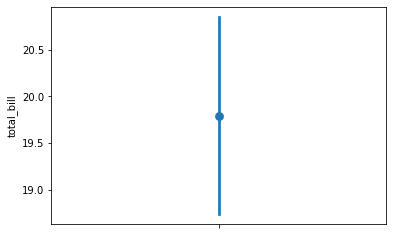

In [15]:
sb.pointplot(y = "total_bill", data = tips)

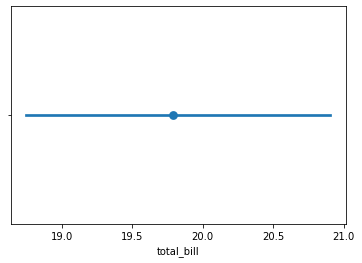

In [16]:
sb.pointplot(x = "total_bill", data = tips)

## la fonction violinplot()
la fonction violinplot() permet d'obtenir un graphique qui représente la densité d'une variable, toujours avec le choix vertical/horizontale (y/x).

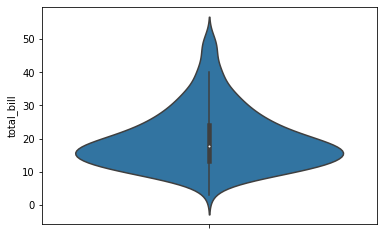

In [17]:
sb.violinplot(y = "total_bill", data = tips)

In [18]:
seaborn.violinplot(x = "total_bill", data = tips)

NameError: name 'seaborn' is not defined

## la fonction stripplot()
La fonction stipplot() permet de représenter toutes les valeurs sur un pseudo nuage de points. Si l'option jitter de stipplot() est, les points sont aléatoirement répartis sur l'axe des  x  (inversement si on utilise y).

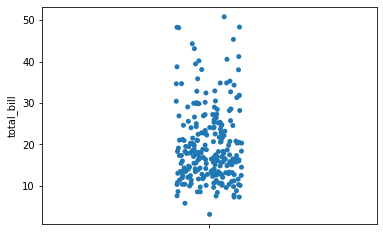

In [19]:
sb.stripplot(y = "total_bill", data = tips, jitter = True)

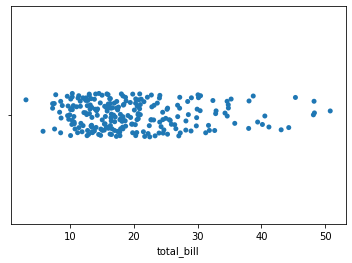

In [22]:
sb.stripplot(x = "total_bill", data = tips, jitter = True)

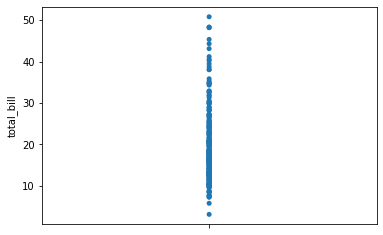

In [23]:
sb.stripplot(y = "total_bill", data = tips, jitter = False)

## la fonction factorplot()
La fonction factorplot() regroupe l'ensemble des graphiques précédents (sauf l'histogramme) en une seule fonction. On accède aux différentes sous-fonctions en indiquant dans le paramètre kind :
        - point : moyenne +/- écart-type
        - box : boîte à moustaches
        - violin : denisté (en symétrie)
        - strip : pseudo nuage de points
        
Cette fonction existe toujours mais elle a été remplacée par catplot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


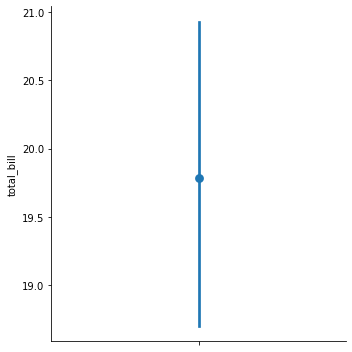

In [24]:
sb.factorplot(y = "total_bill", data = tips, kind = "point")

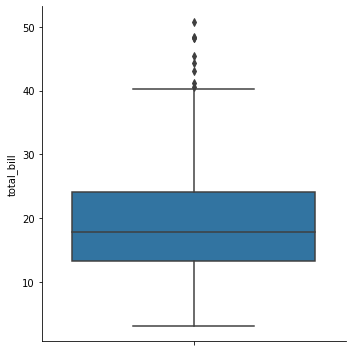

In [25]:
sb.factorplot(y = "total_bill", data = tips, kind = "box")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


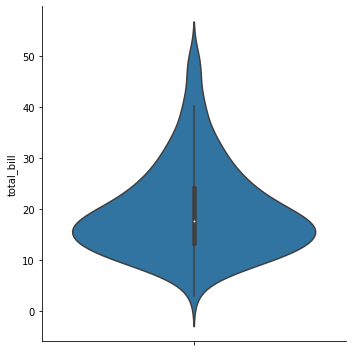

In [26]:
sb.factorplot(y = "total_bill", data = tips, kind = "violin")

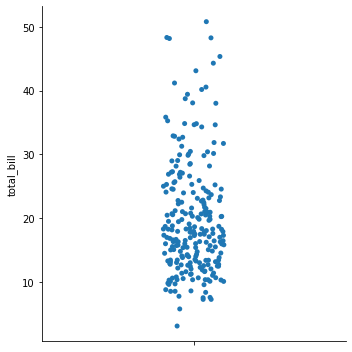

In [27]:
sb.factorplot(y = "total_bill", data = tips, kind = "strip")

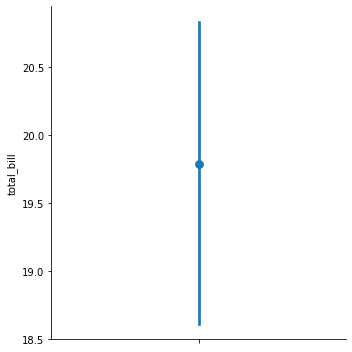

In [29]:
sb.catplot(y = "total_bill", data = tips, kind = "point")

# Variable qualitative

## La fonction countplot()

Le diagramme en barres est obtenu via la fonction countplot(). Il est soit horizontal (avec la variable en x), soit vertical (en y).

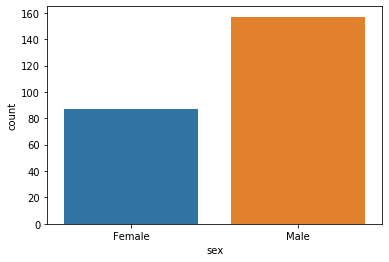

In [30]:
sb.countplot(x = "sex", data = tips)

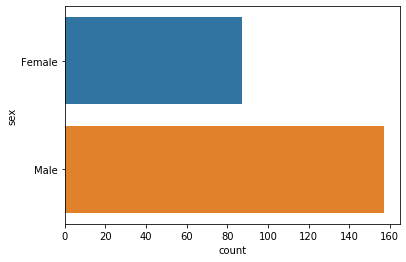

In [32]:
sb.countplot(y = "sex", data = tips)

Pour avoir la version en pourcentages (ou en proportions) de ce graphique, nous devons utiliser la fonction barplot(), sur la table de proportions calculée avant. Cette fonction réalise un calcul (moyenne par défaut) sur une variable (ici freq) en fonction des modalités d'une autre variable (sex ici donc).

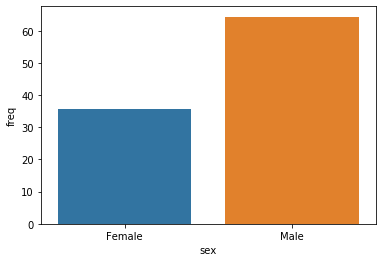

In [33]:
t = pd.crosstab(tips.sex, "freq", normalize=True)
t = t.assign(sex = t.index, freq = 100 * t.freq)
sb.barplot(x = "sex", y = "freq", data = t)

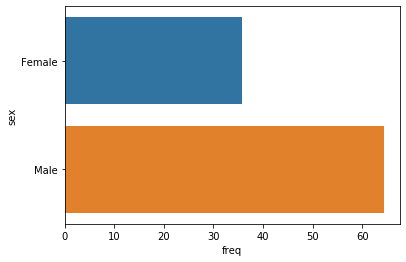

In [34]:
sb.barplot(x = "freq", y = "sex", data = t)

la fonction factorplot() permet d'accéder aux sous-fonctions avec le choix dans kind.

        - count : diagramme en barres (dénombrement)
        - bar : diagramme en barres avec calcul

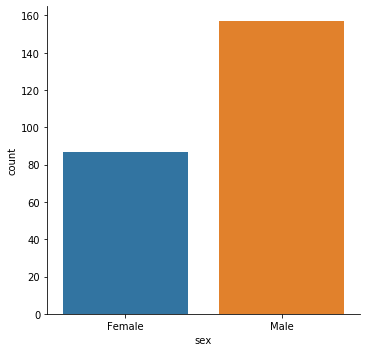

In [35]:
sb.factorplot(x = "sex", data = tips, kind = "count")

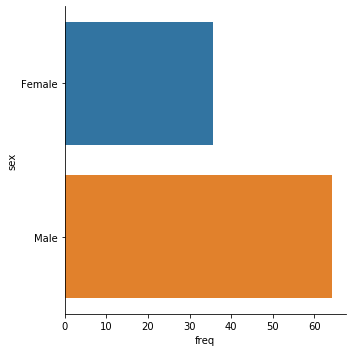

In [36]:
sb.factorplot(x = "freq", y = "sex", data = t, kind = "bar")

## Variable quantitative - Variable quantitative

Pour réaliser le nuage de points, on utilise la fonction jointplot(). Elle a l'avantage d'ajouter par défaut les histogrammes de chaque variable. Elle réalise par défaut le nuage de points simple (scatter). Comme pour factorplot(), on va pouvoir choisir le type de graphique avec le paramètre kind.

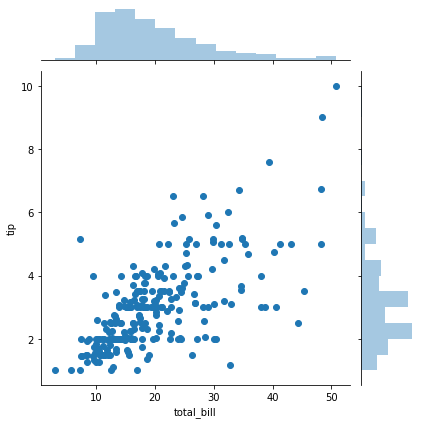

In [37]:
sb.jointplot(x = "total_bill", y = "tip", data = tips)

En choississant le type reg, on obtient en plus l'ajustement linéaire de la variable en y par celle en x.

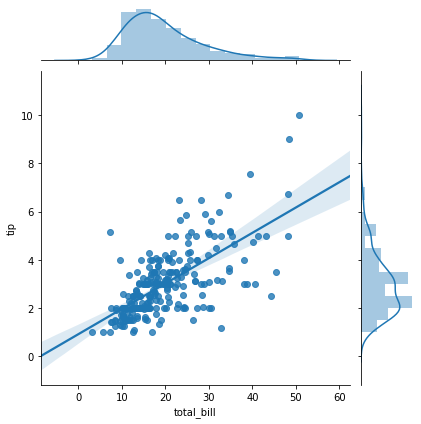

In [38]:
sb.jointplot(x = "total_bill", y = "tip", data = tips, kind = "reg")

On peut obtenir une heatmap, non pas avec des rectangles mais un pavage hexagonal, avec kind = "hex".

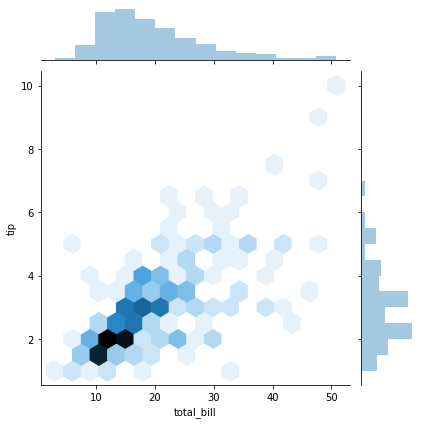

In [39]:
sb.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex")

Enfin, on peut avoir une estimation de la densité en 2d avec le type kde.

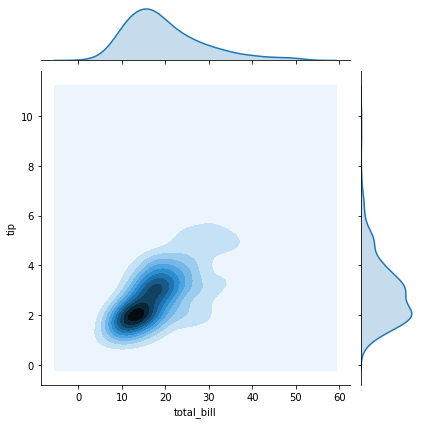

In [40]:
sb.jointplot(x = "total_bill", y = "tip", data = tips, kind = "kde")

Si on souhaite ne pas avoir les distributions marginales, la fonction regplot() nous permet de réaliser le nuage de points avec ou sans ajustement (paramètre fit_reg). On peut aussi n'afficher que l'ajustement.

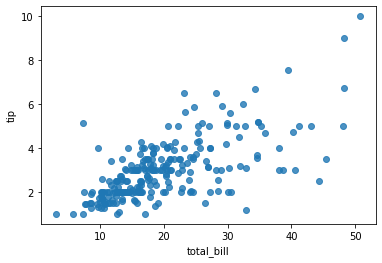

In [41]:
sb.regplot("total_bill", "tip", data = tips, fit_reg = False)

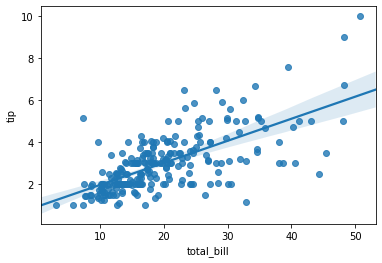

In [42]:
sb.regplot("total_bill", "tip", data = tips)

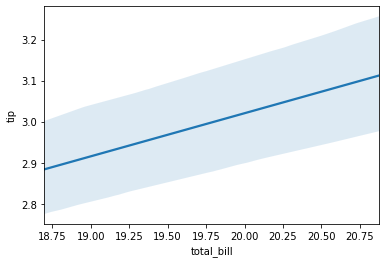

In [43]:
sb.regplot("total_bill", "tip", data = tips, scatter = False)

Il est possible d'obtenir directement tous les nuages de points 2 à 2, avec la fonction pairplot(). Le paramètre vars permet de sélectionner certaines variables. Par défaut, la fonction utilise toutes les variables numériques.

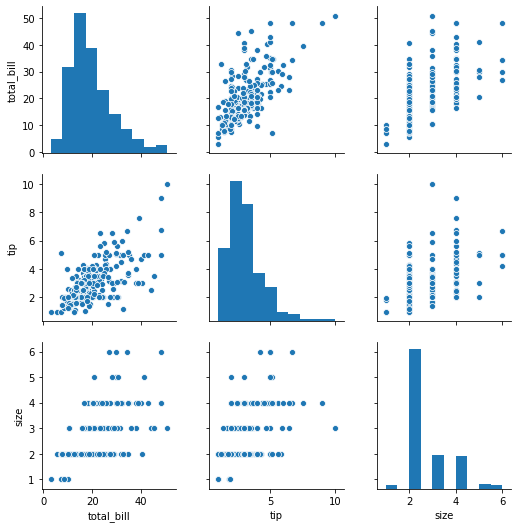

In [44]:
sb.pairplot(data = tips, vars = ["total_bill", "tip", "size"])

## Variable qualitative variable qualitative

Pour obtenir le diagramme en barres séparées (en effectifs), nous utilisons la fonction factorplot() avec le paramètre hue (celui-ci provient de la fonction countplot()).

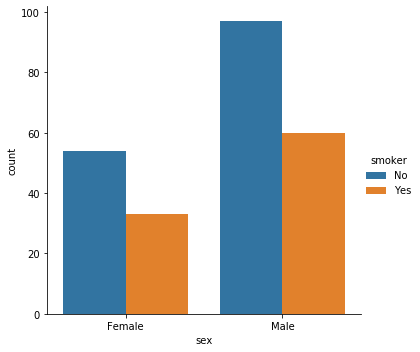

In [45]:
sb.factorplot(x = "sex", hue = "smoker", data = tips, kind = "count")

Cette fonction factorplot() permet aussi un découpage en facette avec les paramètres row et col. Ici, nous découpons donc le graphique en fonction des modalités de smoker.

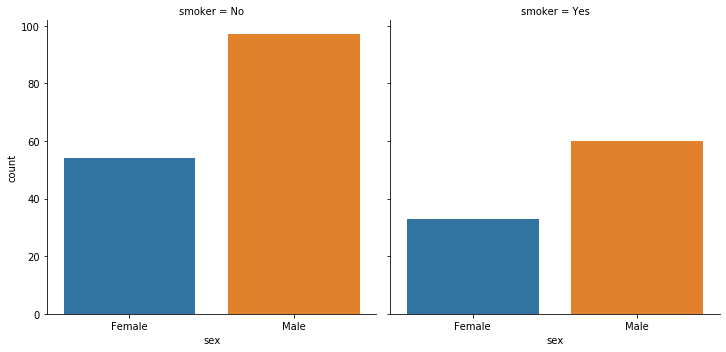

In [46]:
sb.factorplot(x = "sex", col = "smoker", data = tips, kind = "count")

Pour avoir la version en pourcentages, il faut faire les calculs avant, modifier la structure du résultat et les afficher ensuite.

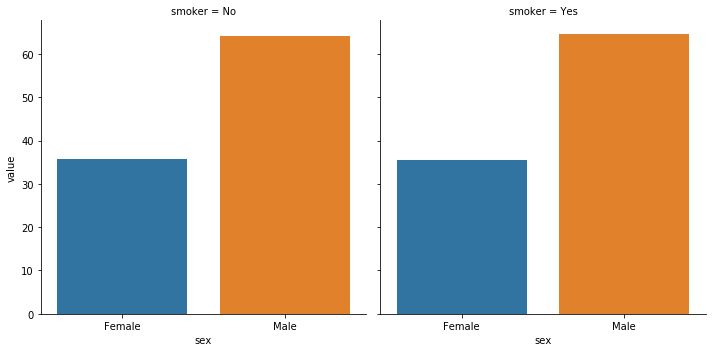

In [49]:
t = pd.crosstab(tips.sex, tips.smoker, normalize = "columns")
t = t.assign(sex = t.index)
tm = pd.melt(t, id_vars = "sex")
tm = tm.assign(value = 100 * tm.value)

sb.factorplot("sex", y = "value", col = "smoker", data = tm, kind = "bar")

Une autre représentation est de visualiser la table de contingence avec une heatmap (la couleur dépendra du nombre d'individus pour chaque couple de modalité).

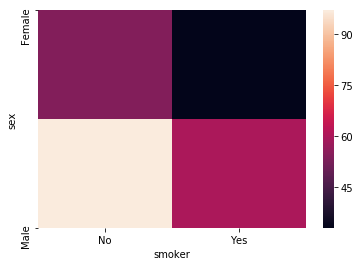

In [52]:
sb.heatmap(pd.crosstab(tips.sex, tips.smoker))

# Variable quantitative - Variable qualitative

Pour réaliser les histogrammes de la variable quantitative pour chaque modalité de la variable qualitative, il faut passer par la fonction FacetGrid(), permettant de faire un découpage en plusieurs lignes (avec row) et/ou en plusieurs colonnes (avec col). On applique ensuite la fonction distplot() avec les paramètres (ici la variable total_bill).

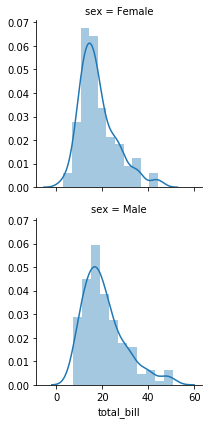

In [53]:
p = sb.FacetGrid(tips, row = "sex")
p.map(sb.distplot, "total_bill")

Les boîtes à moustaches sont elles faciles à créer avec factorplot() (ou boxplot() directement).

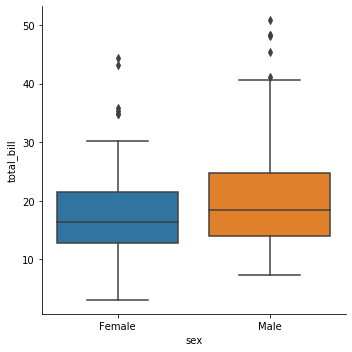

In [54]:
sb.factorplot(x = "sex", y = "total_bill", data = tips, kind = "box")

On peut aussi représenter la moyenne et l'écart-type à l'aide du graphique pointplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


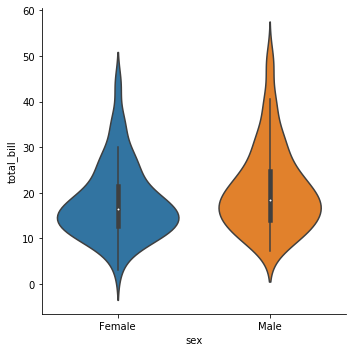

In [55]:
sb.factorplot(x = "sex", y = "total_bill", data = tips, kind = "violin")

On a aussi la possibilité de représenter le pseudo nuage de points, avec stripplot (avec jitter à True.

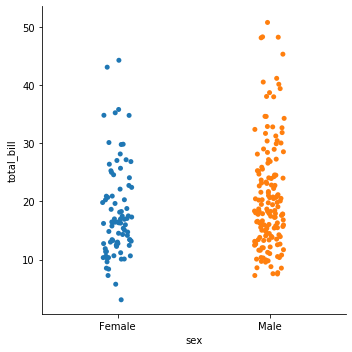

In [56]:
sb.factorplot(x = "sex", y = "total_bill", data = tips, kind = "strip", jitter = True)

# Multivariables

## 3 quantitatives

Dans ce cas, nous cherchons à faire une heatmap du croisement entre les versions discrétisées en intervalles de deux variables quantitatives, la couleur d'un rectangle dépendant de la moyenne (ici mean du module numpy) d'une troisième variable. On créé la table puis l'affiche.

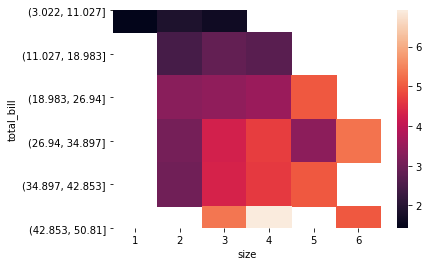

In [58]:
t = pd.crosstab(pd.cut(tips.total_bill, bins = 6),
                    tips["size"],
                    values = tips.tip, aggfunc = np.mean)
sb.heatmap(t)

## 2 quantitatives et 1 qualitative

Dans ce cas, il est possible de faire le nuage de points avec la fonction lmplot(), en utilisant le principe de grille (comme factorplot()) avec un découpage en colonnes (via col). On peut aussi améliorer la distinction en ajoutant une couleur différente sur la variable sex avec le paramètre hue.

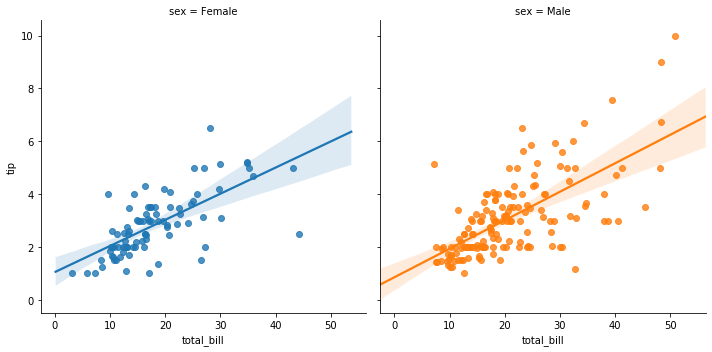

In [60]:
sb.lmplot("total_bill", "tip", hue = "sex", col = "sex", data = tips)

## 1 quantitative et 2 qualitatives
Il est possible de créer les histogrammes de la variable quantitative pour chaque couple de modalités sur les deux variables qualitatives avec FacetGrid().

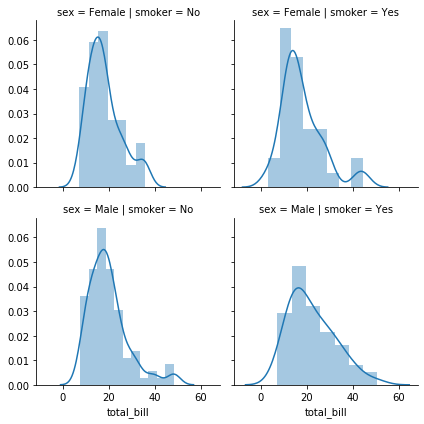

In [61]:
p = sb.FacetGrid(tips, row = "sex", col = "smoker")
p.map(sb.distplot, "total_bill")

Pour les boîtes à moustaches, on utilise la fonction factorplot() qui permet d'ajouter une couleur en fonction d'une variable qualitative via le paramètre hue.

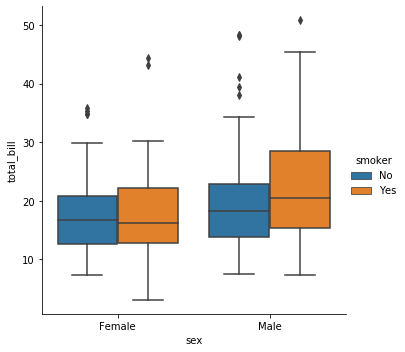

In [62]:
sb.factorplot(x = "sex", y = "total_bill", hue = "smoker", data = tips, kind = "box")

Cette même fonction factorplot() permet le découpage en lignes (row) ou en colonnes (col), qui nous est utile pour le graphique point.

In [91]:
##sb.catplot(x = "sex", y = "total_bill", hue = "smoker", col="smoker", data = tips, kind = "point", join=False )

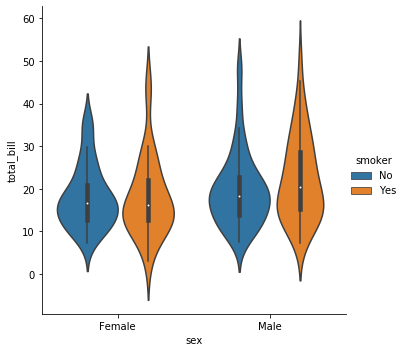

In [79]:
sb.factorplot(x = "sex", y = "total_bill", hue = "smoker", data = tips, kind = "violin")

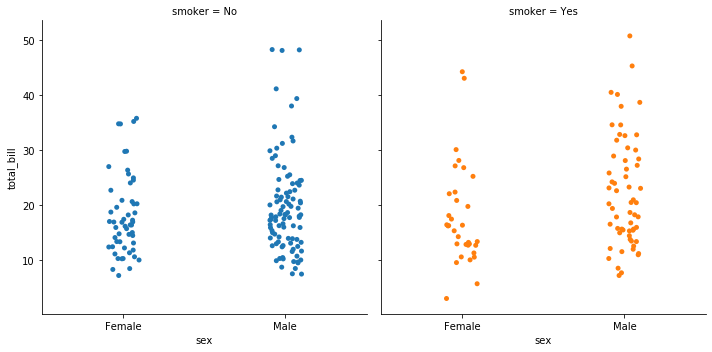

In [81]:
sb.factorplot(x = "sex", y = "total_bill", hue = "smoker", col = "smoker", data = tips, 
                   kind = "strip", jitter = True)

## 3  qualitatives

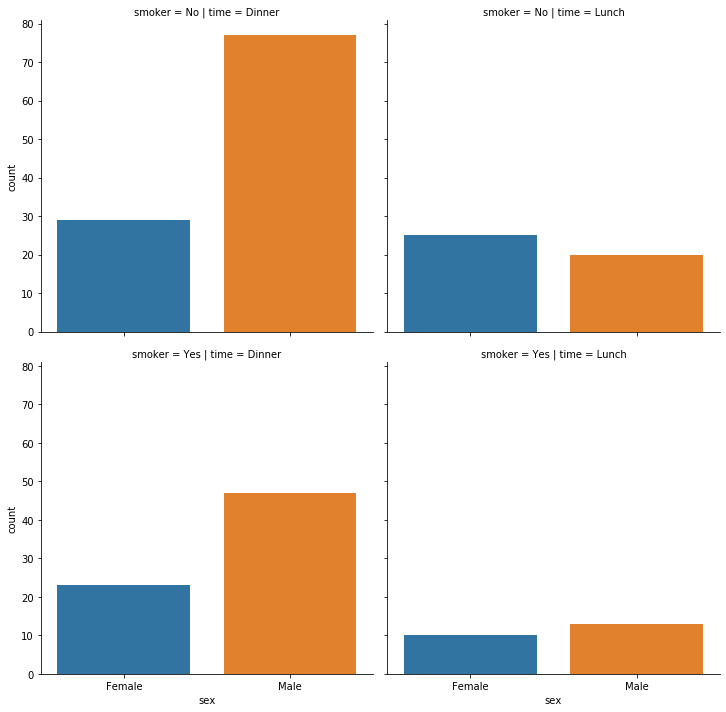

In [82]:
sb.factorplot(x = "sex", row = "smoker", col = "time", data = tips, kind = "count")

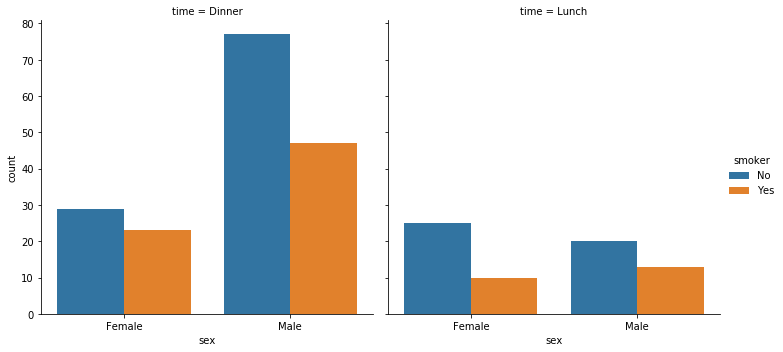

In [83]:
sb.factorplot(x = "sex", hue = "smoker", col = "time", data = tips, kind = "count")

Pour avoir la version sommée à 100%, il faut calculer la table en premier, la restructurer et l'afficher.

In [84]:
t = pd.crosstab([tips.smoker, tips.time], tips.sex, normalize = "index")
t = t.assign(smoker_time = t.index)
tm = pd.melt(t, id_vars="smoker_time")
tm = tm.assign(value = 100 * tm.value)

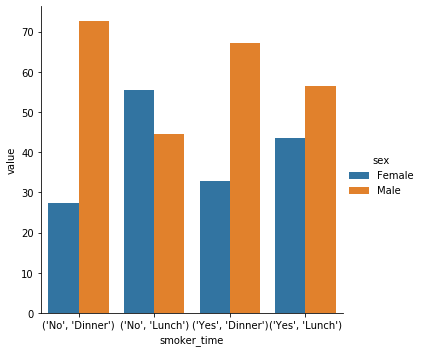

In [86]:
sb.factorplot(x = "smoker_time", y = "value", hue = "sex", data = tm, 
                   kind = "bar")

On accède aux fonctions de personnalisation soit via des paramètres de la fonction, soit via l'objet renvoyé par la fonction utilisée pour créer le graphique, soit via le module directement. Dans ce cas, ce sont des changements qui affecteront aussi les graphiques futurs.

- suptitle dans fig : titre global
- set_axis_labels : titre des axes
- size et aspect : hauteur et ratio entre hauteur et largeur, pour chaque facette

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


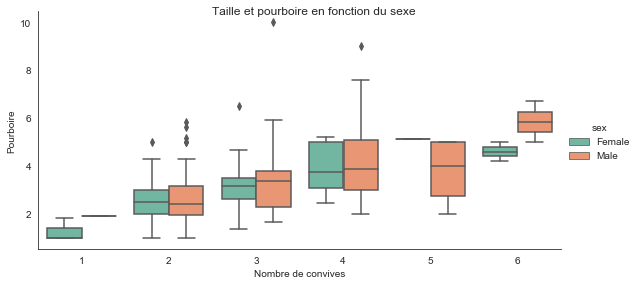

In [88]:
sb.set_style("white")
p = sb.factorplot(x = "size", y = "tip", hue = "sex", data = tips, kind = "box",
                      palette = "Set2", height = 4, aspect = 2)
p.fig.suptitle("Taille et pourboire en fonction du sexe")
p.set_axis_labels("Nombre de convives", "Pourboire")

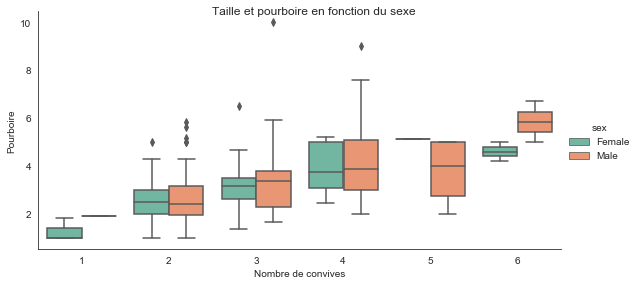

In [89]:
sb.set_style("white")
p = sb.catplot(x = "size", y = "tip", hue = "sex", data = tips, kind = "box",
                      palette = "Set2", height = 4, aspect = 2)
p.fig.suptitle("Taille et pourboire en fonction du sexe")
p.set_axis_labels("Nombre de convives", "Pourboire")